# Magnetopause Lab 03 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math


## Importing Magnetic Field and Solar Wind Data from CDAWEB

In [2]:
fgm = pd.read_csv('fgmdata_ms.csv') # Magnetic field data in nT (MAGNETOSHEATH)
fgm

,UT,B_TOTAL,BX,BY,BZ
0,2009-09-15T14:47:23.478Z,26.7384,0.760739,-4.87570,-26.2791
1,2009-09-15T14:47:26.610Z,24.3595,-1.035510,-5.46641,-23.7156
2,2009-09-15T14:47:29.742Z,25.7316,-0.433656,-4.56628,-25.3195
3,2009-09-15T14:47:32.874Z,26.5136,-0.857697,-5.20363,-25.9838
4,2009-09-15T14:47:36.006Z,24.3876,0.942579,-5.32786,-23.7798
...,...,...,...,...,...
2537,2009-09-15T16:59:49.586Z,18.2417,-2.664060,1.74770,17.9613
2538,2009-09-15T16:59:52.718Z,19.8812,-2.844870,-0.56367,19.6686
2539,2009-09-15T16:59:55.850Z,24.7786,-3.375480,-7.11792,23.4929
2540,2009-09-15T16:59:58.982Z,26.5696,-3.142340,-8.14023,25.0959


In [3]:
mom = pd.read_csv('momdata_ms.csv') # Solar wind data N in #/cm^3, V in km/sec, T in eV (MAGNETOSHEATH)
mom

,UT,N_ION,VX_ION,VY_ION,VZ,TX_ION,TY_ION,TZ_ION,VT_ION,TT_ION
0,2009-09-15T14:47:22.234Z,27.517014,-98.770652,-90.109350,27.391210,173.71701,169.76760,103.96400,136.475694,264.210429
1,2009-09-15T14:47:25.366Z,27.487779,-99.720304,-101.274200,27.419543,179.09412,190.90685,107.68784,144.749556,283.049112
2,2009-09-15T14:47:28.498Z,26.086347,-110.451060,-94.334115,27.070611,176.58680,189.45682,112.66143,147.753781,282.434740
3,2009-09-15T14:47:31.630Z,27.224940,-108.173690,-107.334730,26.909578,184.29183,179.85542,109.38000,154.746298,279.777474
4,2009-09-15T14:47:34.762Z,25.531556,-98.017662,-100.446720,32.137935,171.74919,177.82575,113.30784,143.978653,271.953026
...,...,...,...,...,...,...,...,...,...,...
2537,2009-09-15T16:59:48.341Z,24.174725,-98.741369,-68.332531,16.942242,258.34062,255.17619,162.93551,121.269255,397.998423
2538,2009-09-15T16:59:51.473Z,23.270142,-105.973660,-78.366579,24.148666,238.00799,245.51047,159.24519,133.995878,377.203161
2539,2009-09-15T16:59:54.606Z,22.423923,-119.850840,-98.517489,20.910502,215.83205,220.35216,155.73659,156.547656,345.532102
2540,2009-09-15T16:59:57.738Z,21.811134,-121.346010,-85.402316,18.811049,214.11392,218.23950,154.40810,149.573612,342.512936


## Converting V and N values to SI units

In [4]:
mom['VT_MSEC'] = mom['VT_ION']*10**3 # V(km/sec) to V(m/sec)
mom['N_M'] = mom['N_ION']*10**6 # N(#/cm^3) to N(#/m^3)

In [5]:
mom

,UT,N_ION,VX_ION,VY_ION,VZ,TX_ION,TY_ION,TZ_ION,VT_ION,TT_ION,VT_MSEC,N_M
0,2009-09-15T14:47:22.234Z,27.517014,-98.770652,-90.109350,27.391210,173.71701,169.76760,103.96400,136.475694,264.210429,136475.6940,27517014.0
1,2009-09-15T14:47:25.366Z,27.487779,-99.720304,-101.274200,27.419543,179.09412,190.90685,107.68784,144.749556,283.049112,144749.5560,27487779.0
2,2009-09-15T14:47:28.498Z,26.086347,-110.451060,-94.334115,27.070611,176.58680,189.45682,112.66143,147.753781,282.434740,147753.7813,26086347.0
3,2009-09-15T14:47:31.630Z,27.224940,-108.173690,-107.334730,26.909578,184.29183,179.85542,109.38000,154.746298,279.777474,154746.2984,27224940.0
4,2009-09-15T14:47:34.762Z,25.531556,-98.017662,-100.446720,32.137935,171.74919,177.82575,113.30784,143.978653,271.953026,143978.6529,25531556.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2537,2009-09-15T16:59:48.341Z,24.174725,-98.741369,-68.332531,16.942242,258.34062,255.17619,162.93551,121.269255,397.998423,121269.2554,24174725.0
2538,2009-09-15T16:59:51.473Z,23.270142,-105.973660,-78.366579,24.148666,238.00799,245.51047,159.24519,133.995878,377.203161,133995.8782,23270142.0
2539,2009-09-15T16:59:54.606Z,22.423923,-119.850840,-98.517489,20.910502,215.83205,220.35216,155.73659,156.547656,345.532102,156547.6559,22423923.0
2540,2009-09-15T16:59:57.738Z,21.811134,-121.346010,-85.402316,18.811049,214.11392,218.23950,154.40810,149.573612,342.512936,149573.6116,21811134.0


## Calculating the Magnetopause Distance

Since we assume that the data belong to the subsolar point, $cos^2(\psi)$ is 1.

### $R_{mp} = \sqrt[6]{\frac{B_0^2}{(\mu_0nm_pV_{sw}^2cos^2(\psi))}}$ $(R_e)$

In [6]:
mu = 4 * math.pi * 10**(-7) # The vacuum permeability, permeability of free space
print(mu)

1.2566370614359173e-06


In [7]:
mp = 1.68*10**(-27) # Proton mass
print(mp)

1.68e-27


In [8]:
b0 = 0.3*10**(-4) # The horizontal component of earth's magnetic field 
print(b0)

3e-05


In [9]:
rmp = (b0**2/(mu*mp*mom['N_M']*mom['VT_MSEC']**2))**(1/float(6))

In [10]:
rmp

0        9.697696
1        9.510971
2        9.528813
3        9.316497
4        9.645875
          ...    
2537    10.307264
2538    10.033603
2539     9.585610
2540     9.777381
2541     9.933396
Length: 2542, dtype: float64

## Calculating the Dynamic Pressure

$P_{dyn} = nm_pV^2 $

In [11]:
pdyn = (mom['N_M']*mp*mom['VT_MSEC']**2)*10**9 # P_dyn in nPa

In [12]:
pdyn

0       0.861036
1       0.967572
2       0.956753
3       1.095259
4       0.889166
          ...   
2537    0.597272
2538    0.701926
2539    0.923239
2540    0.819780
2541    0.745497
Length: 2542, dtype: float64

## Time Series Plot of Bz (nT)

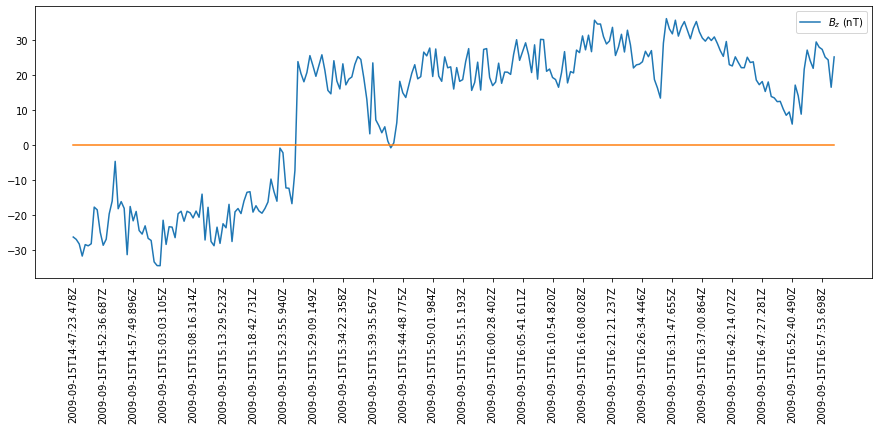

In [13]:
plt.figure(figsize=(15, 5))
plt.plot(fgm['UT'][::10], fgm['BZ'][::10], label = r'$B_z$ (nT)')
plt.xticks(fgm['UT'][::100], rotation='vertical');
plt.legend()
# Drawing a line to indicate the boundary between negative and positive values
x= np.zeros(len(fgm['UT']))
plt.plot(fgm['UT'][::10], x[::10])



## Time Series Plot of $P_{dyn}$ (nPa)

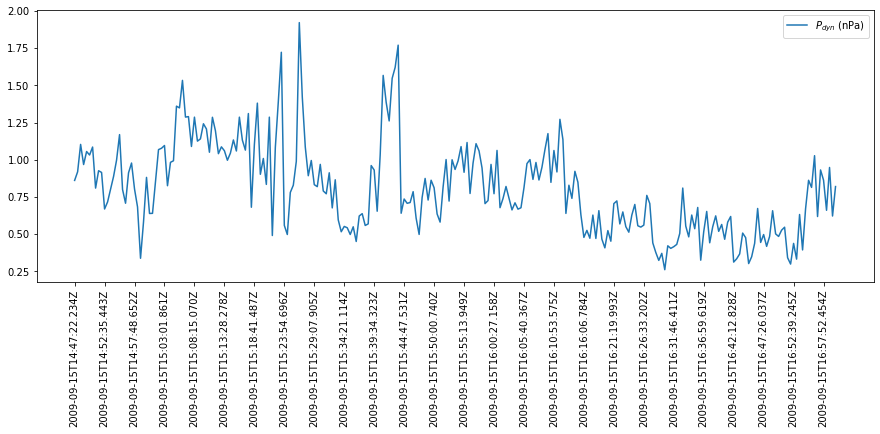

In [14]:
plt.figure(figsize=(15, 5))

plt.plot(mom['UT'][::10], pdyn[::10], label =r'$P_{dyn}$ (nPa)')

plt.legend()

plt.xticks(mom['UT'][::100], rotation='vertical');


## Time Series Plot of $R_{mp}$ (Re)

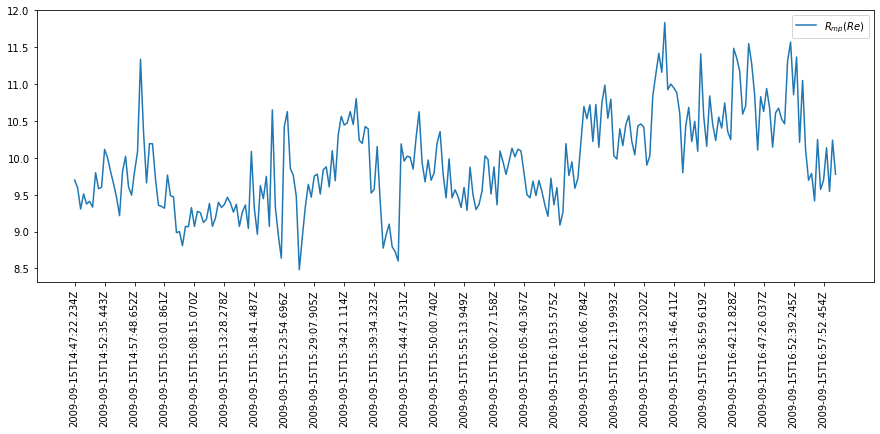

In [15]:
plt.figure(figsize=(15, 5))

plt.plot(mom['UT'][::10], rmp[::10], label =r'$R_{mp} (Re)$')

plt.legend()

plt.xticks(mom['UT'][::100], rotation='vertical');

## Scatter Plot of $P_{dyn}$ (nPa) vs $R_{mp}$ (Re)

Text(0, 0.5, '$R_{mp}$ (Re)')

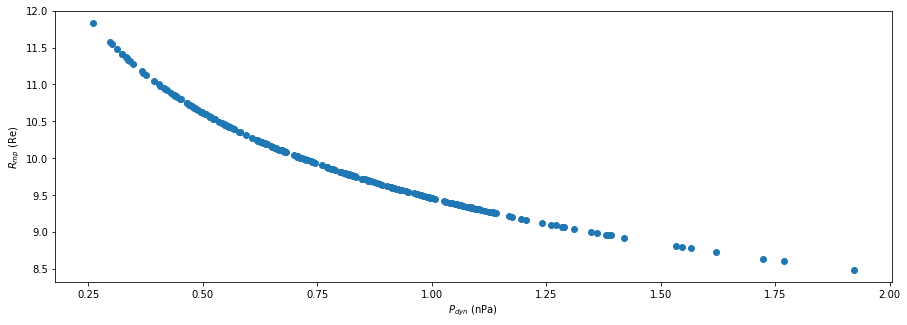

In [16]:
plt.figure(figsize=(15, 5))
plt.plot(pdyn[::10], rmp[::10],'o')
plt.xlabel(r'$P_{dyn}$ (nPa)')
plt.ylabel(r'$R_{mp}$ (Re)')

## Scatter Plot of $B_z$ (nT) vs $R_{mp}$ (Re)

Text(0, 0.5, '$R_{mp}$ (Re)')

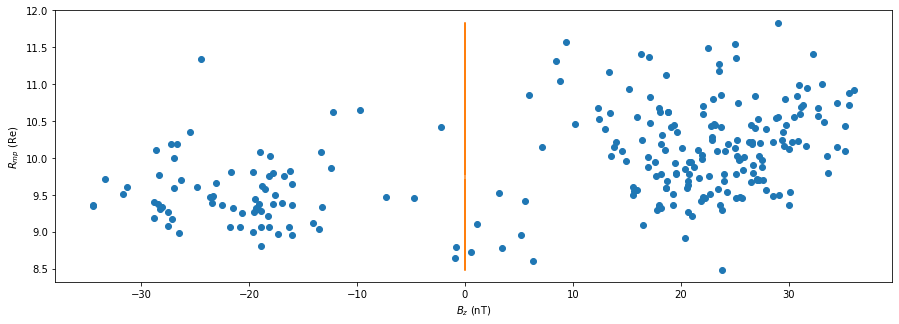

In [17]:
plt.figure(figsize=(15, 5))
plt.plot(fgm['BZ'][::10], rmp[::10],'o')

plt.plot(np.zeros(len(rmp))[::10],rmp[::10])

plt.xlabel(r'$B_z$ (nT)')
plt.ylabel(r'$R_{mp}$ (Re)')


## Calculating the Auroral Latitude $\Lambda$

$cos(\lambda)=\frac{1}{\sqrt{L}}$

$L=int(R_{mp})$

In [18]:
rmp = rmp.replace([np.nan, np.inf, -np.inf], 9) # To get rid of NaN and inf data, converting them to 9 since it is the avarage
rmp

0        9.697696
1        9.510971
2        9.528813
3        9.316497
4        9.645875
          ...    
2537    10.307264
2538    10.033603
2539     9.585610
2540     9.777381
2541     9.933396
Length: 2542, dtype: float64

In [19]:
# math functions do not work with series so numpy is used
# with .astype(int), all rmp converted to int and 180/pi for converting radian to degree
al = np.arccos(1/(rmp.round(0).astype(int))**(1/2))*(180/math.pi) #round(0) for rounding 9.6 to 10

al

0       71.565051
1       71.565051
2       71.565051
3       70.528779
4       71.565051
          ...    
2537    71.565051
2538    71.565051
2539    71.565051
2540    71.565051
2541    71.565051
Length: 2542, dtype: float64

## Scatter Plot of Auroral Latitude vs $R_{mp}$

Text(0.5, 0, '$R_{mp}$')

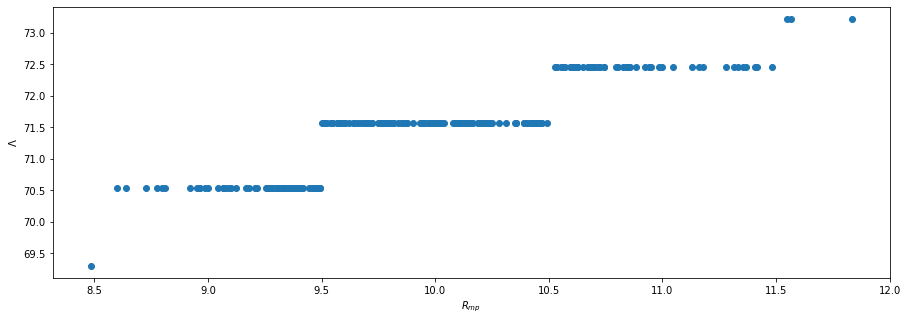

In [20]:
plt.figure(figsize=(15, 5))
plt.plot(rmp[::10],al[::10],'o')
plt.ylabel(r'$\Lambda$')
plt.xlabel(r'$R_{mp}$')

## Scatter Plot of $P_{dyn}$ (nPa) vs Auroral Latitude

Text(0, 0.5, '$\\Lambda$')

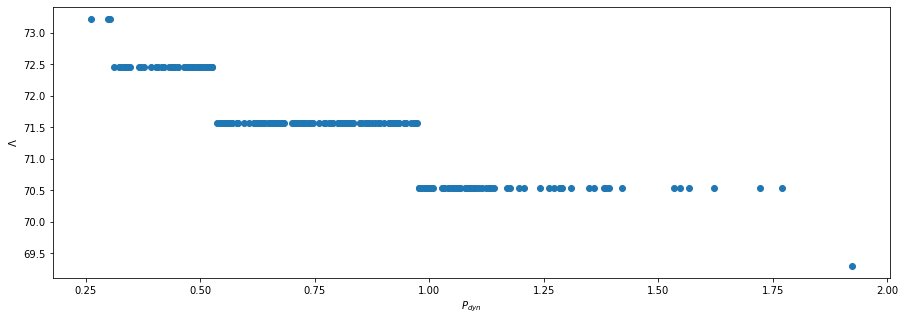

In [21]:
plt.figure(figsize=(15, 5))
plt.plot(pdyn[::10], al[::10],'o')
plt.xlabel(r'$P_{dyn}$')
plt.ylabel(r'$\Lambda$')

## Statistic calculations

#### Bz > 0

In [22]:
filt = (fgm['BZ'] > 0) # Filtering the positive values

In [23]:
table_bzplus = fgm.loc[filt,'BZ'].agg(['mean', 'median', 'max', 'min', 'std']) 

#### Bz < 0

In [24]:
filt2 = (fgm['BZ']<0) & (fgm['BZ']> -50 ) #Filtering the negative values and removing flag data

In [25]:
table_bzneg = fgm.loc[filt2, 'BZ'].agg(['mean', 'median', 'max', 'min', 'std']) 

#### Pdyn

In [26]:
table_pdyn = pdyn.agg(['mean', 'median', 'max', 'min', 'std'])

#### Rmp

In [27]:
table_rmp = rmp.agg(['mean', 'median', 'max', 'min', 'std'])

#### $\Lambda$

In [28]:
table_al = al.agg(['mean', 'median', 'max', 'min', 'std'])

### Statistic Table

In [29]:
statistic = pd.DataFrame(table_bzplus)
statistic = statistic.rename(columns = {'BZ':'Bz>0'})
statistic['Bz<0'] = table_bzneg
statistic['Pdyn'] = table_pdyn
statistic['Rmp'] = table_rmp
statistic['Auroral Latitude'] = table_al

statistic.T

,mean,median,max,min,std
Bz>0,22.390947,22.884050,36.143600,0.151969,6.945174
Bz<0,-20.372610,-20.616900,-0.007792,-37.123800,6.991760
Pdyn,0.806091,0.768505,3.167741,0.177174,0.316562
Rmp,9.949871,9.883139,12.621340,7.805136,0.656513
Auroral Latitude,71.463809,71.565051,73.897886,69.295189,0.703261


In [30]:
statistic.T.to_excel('statistic_table.xlsx')